<h1>
<center>CFRM 421/5213</center>
</h1>

<h1>
<center>Tong Wu (twu6)</center>
</h1>

<h1>
<center>Homework 3</center>
</h1>

* **Due: Tuesday, May 13, 2025, 11:59 PM**


* Total marks: 38


* Late submissions are allowed, but a 20% penalty per day applies. Your last submission is considered for calculating the penalty.


*  Use this Jupyter notebook as a template for your solutions. **Your solution must be submitted as both one Jupyter notebook and one PDF file on Gradescope.** There will be two modules on Gradescope, one for each file type. The notebook must be already run, that is, make sure that you have run all the code, save the notebook, and then when you reopen the notebook, checked that all output appears as expected. You are allowed to use code from the textbook, textbook website, or lecture notes.

# 1. Applying PCA [6 marks]

## (a) [4 marks]
Train a SVM classifier with a Gaussian RBF kernel on the MNIST training data (the first 60,000 observations). Use the default arguments for the classifier. Take the first 10,000 observations as the training set given by `X_train_red` and `y_train_red` in the code below. Time your training using `%time` and report the accuracy of the trained model on the test set (the last 10,000 observations of MNIST). Now, use PCA on the original training set (60,0000 observations) to find principal components with an explained variance ratio of 60%. Retrain the SVM classifier using these principal components instead of the original features. Time the training and accuracy on the test set. Comment on whether PCA helped or not. Do not shuffle the data and do not use a standard scaler.

In [1]:
import numpy as np

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)
mnist.target = mnist.target.astype(np.int8)
X_train = mnist["data"][:60000]
X_test  = mnist["data"][60000:]
y_train = mnist["target"][:60000]
y_test  = mnist["target"][60000:]
X_train_red = mnist["data"][:10000]
y_train_red = mnist["target"][:10000]

**[Add your solution here]**

In [2]:
import time 
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

t0 = time.time()
svm_clf = SVC()
svm_clf.fit(X_train_red,y_train_red)
print(f"Train time (no PCA): {time.time()-t0:.2f}s")

#launch the accuracy test fot the 10000-sample test 
acc_no_pca = accuracy_score(y_test, svm_clf.predict(X_test))
print(f"Test Accuracy (no PCA): {acc_no_pca:.4f}")

#Training the sample from 60000 sample 
# 0.6 explained variance ratio
pca = PCA(n_components = 0.6, svd_solver='full')
X_train_PCA = pca.fit_transform(X_train)
# fit learns all the parameter from the data X
# transform: take the new data X and project it into the subspaces 
X_test_PCA = pca.transform(X_test)

#train the data:
X_train_pca10000 = X_train_PCA[:10000]

t1 = time.time()
svm_pca = SVC()
svm_pca.fit(X_train_pca10000,y_train_red)
# we do not to PCA on y because PCA is unsupervised featured only function 
print(f"Train time (with PCA): {time.time()-t1:.2f}s")

acc_pca = accuracy_score(y_test, svm_pca.predict(X_test_PCA))
# projecting on the testing set 
print(f"Test Accuracy (PCA): {acc_pca:.4f}")

Train time (no PCA): 5.69s
Test Accuracy (no PCA): 0.9594
Train time (with PCA): 1.22s
Test Accuracy (PCA): 0.9560


## (b) [2 marks]

Repeat (a) using a random forest classifier instead of the SVM classifier and comment on the result. Use `random_state=42` in the classifier and use the default for the other arguments. You are allowed to use `n_jobs=-1`.

**[Add your solution here]**

In [3]:
from sklearn.ensemble import RandomForestClassifier
t0 = time.time()
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_clf.fit(X_train_red, y_train_red)
print(f"Time for RF without PCA: {time.time()-t0:.2f}s")
acc_rf_nopca = accuracy_score(y_test, rf_clf.predict(X_test))
print(f"Test Accuracy for RF without PCA: {acc_no_pca:.4f}")


pca = PCA(n_components = 0.6, svd_solver='full')
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)
X_train_pca10000 = X_train_PCA[:10000]

t1 = time.time()
rf_pca = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_pca.fit(X_train_pca10000, y_train_red)
print(f"RF Train time (with PCA): {time.time() - t1:.2f}s")

acc_rf_pca = accuracy_score(y_test, rf_pca.predict(X_test_PCA))
print(f"RF Test accuracy (with PCA): {acc_rf_pca:.4f}")

Time for RF without PCA: 0.98s
Test Accuracy for RF without PCA: 0.9594
RF Train time (with PCA): 0.79s
RF Test accuracy (with PCA): 0.9180


# 2. Visualizing dimensionality reduction [8 marks]

## (a) [3 marks]
Load the MNIST dataset and take only the first 5,000 observations as `X` and `y`. Use the nonlinear dimensionality reduction technique **t-SNE** to reduce this subset of the MNIST dataset down to 2 dimensions. Include the argument `random_state=42`. Measure how long it took to reduce the dimensionality, this will be used in (b) below. Plot a scatterplot of the outcome of t-SNE. Use 10 different colors to represent each image's target class and plot scaled-down versions of the digit images themselves. The visualization will be too cluttered if you draw the image for every observation, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance. You should get a nice visualization of different classes and some of the digit images in them. See the textbook's Jupyter notebook for the code. Use the plot to comment on which classes are easily identified and which ones can be hard to distinguish.

Hint: See the solution of Chapter 8, Question 10 in this [Jupyter notebook](https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynb) on the textbook website to see how to implement t-SNE and produce these plots using the `plot_digits()` function.

**[Add your solution here]**

t-SNE took 8.99s


Text(0.5, 1.0, 't-SNE of 5000 MNIST digits')

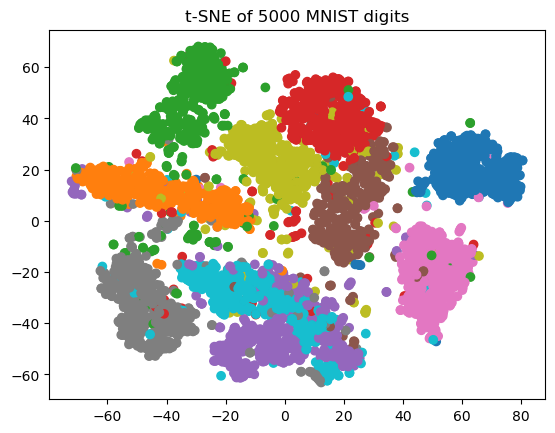

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)
mnist.target = mnist.target.astype(np.int8)
X, y = mnist["data"][:5000], mnist ["target"][:5000]

t0 = time.time()
tsne = TSNE(n_components = 2, random_state = 42, init = 'pca', learning_rate = 'auto')
X2 = tsne.fit_transform(X)
print(f"t-SNE took {time.time() - t0:.2f}s")

#scatter with 10 - color 
plt.figure()
plt.scatter(X2[:,0], X2[:,1], c=y, cmap='tab10')
plt.title("t-SNE of 5000 MNIST digits")
# plot the two t-SNE dimensions, 
# c = y tells the Matplotlib to color each point according to the figit 

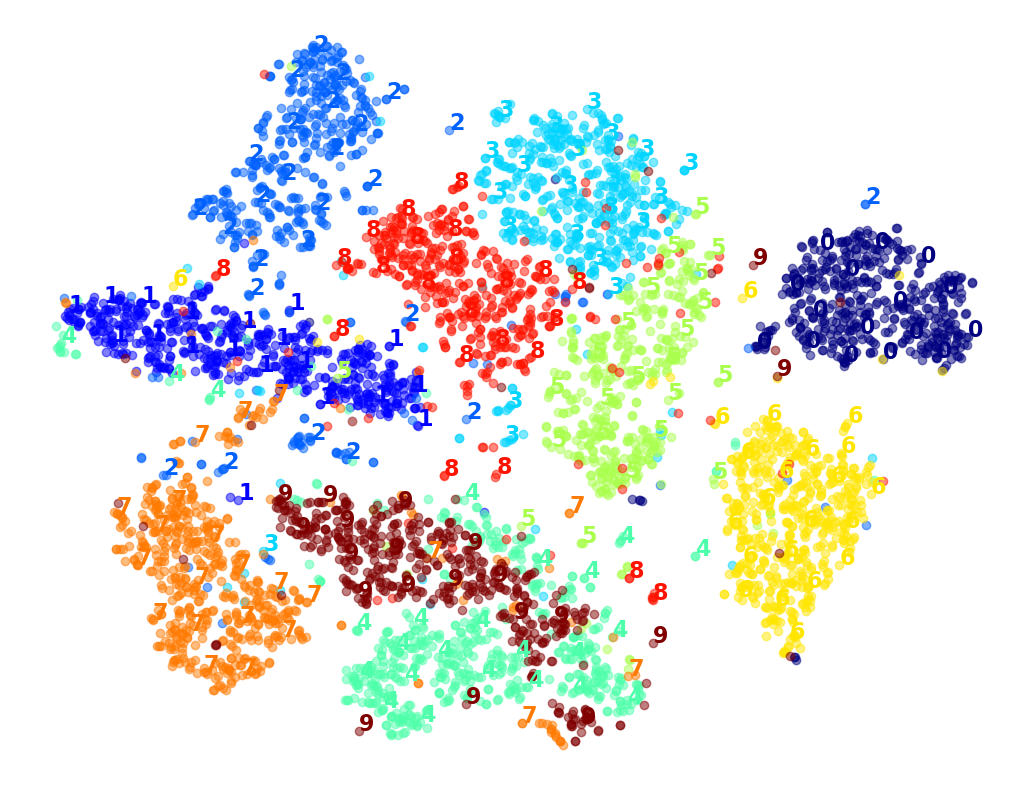

In [12]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import offsetbox
def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    X_norm = MinMaxScaler().fit_transform(X)
    #normalized both columns of X to [0,1] for consistent spacing 
    neighbors = np.array([[10.0, 10.0]])
    #scatterplot of all points by digit class
    plt.figure(figsize = figsize)
    cmap = plt.cm.jet
    for digit in np.unique(y):
        plt.scatter(X_norm[y == digit, 0], X_norm[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.5)
        # select the 2D x and y coordinates of exactly those points whose label equal digit 
    plt.axis("off")
    
    ax = plt.gca()
    # get the current axes 
    for index, image_coord in enumerate(X_norm):
        # after enumerate the X_norm, it has two variables. one is index and another one is image_coord
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            # decide whether or not we draw 
            if images is None:
                # if there is no image to pass, we write the digit label 
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
                # if there is image provided, create an offsetImage and warp it into the Annotation Bos 
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)
                # add it to the axes with ax.add_artist 
    
plot_digits(X=X2, y=y)
plt.show()

## (b) [5 marks]
Try using other dimensionality reduction methods. Specifically, try:

* Regular PCA to reduce to 2 dimensions.
* LLE to reduce to 2 dimensions.
* First apply PCA with an explained variance ratio of 95%, then apply t-SNE to reduce to 2 dimensions.

For each algorithm, include the argument `random_state=42`. Then for each of the three methods above, report how long it took to reduce the dimension. Also, provide a 2D plot of the results. Which method runs faster? Which one results in a better visualization? Include t-SNE from (a) as part of your comparison.

**[Add your solution here]**

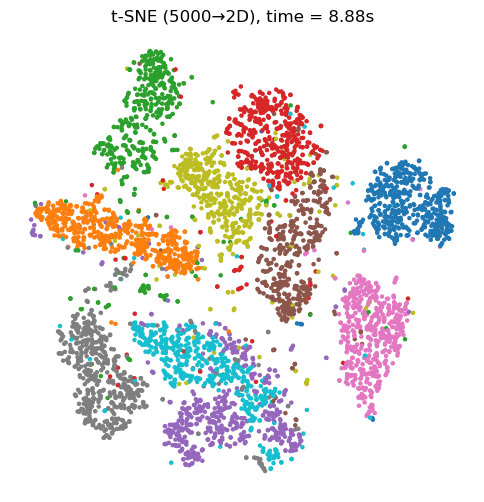

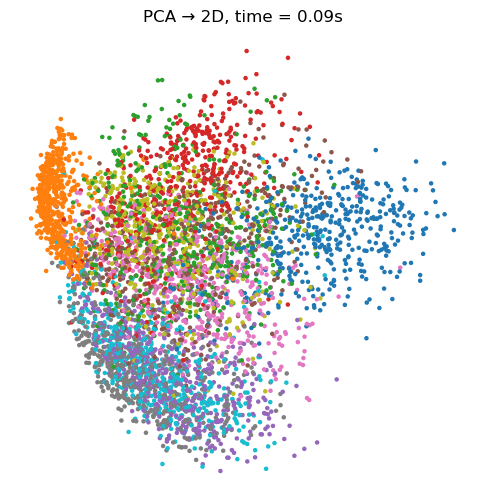

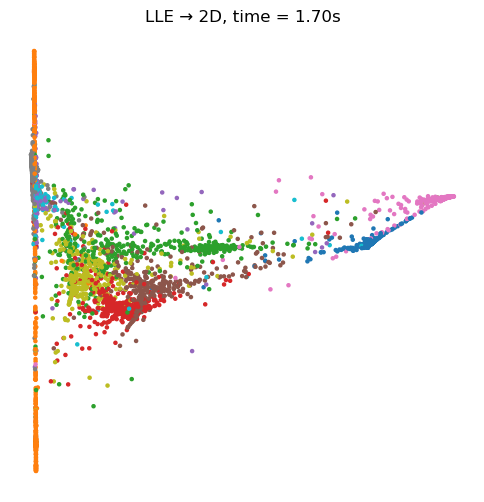

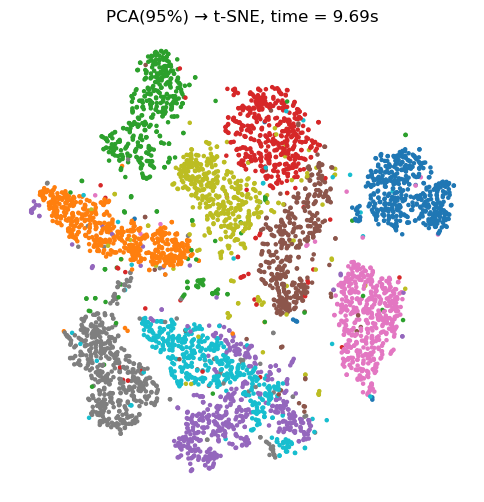

In [14]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding

t0 = time.time()
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_tsne      = tsne.fit_transform(X)
time_tsne   = time.time() - t0

plt.figure(figsize=(6,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='tab10', s=5)
plt.title(f"t-SNE (5000→2D), time = {time_tsne:.2f}s")
plt.axis('off')
plt.show()

#regular PCA to reduce 2 dimensions 
t0 = time.time()
pca2 = PCA(n_components=2, random_state=42)
X_pca2 = pca2.fit_transform(X)
time_pca2 = time.time()-t0 

plt.figure(figsize=(6,6))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap='tab10', s=5)
plt.title(f"PCA → 2D, time = {time_pca2:.2f}s")
plt.axis('off')
plt.show()

#LLE to reduce 2 dimensions
t0 = time.time()
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle = lle.fit_transform(X)
time_lle = time.time() - t0

plt.figure(figsize=(6,6))
plt.scatter(X_lle[:,0], X_lle[:,1], c=y, cmap='tab10', s=5)
plt.title(f"LLE → 2D, time = {time_lle:.2f}s")
plt.axis('off')
plt.show()

# PCA (evr = 0.95) & TSNE to reduce 2 dimension
t0 = time.time()
pca95 = PCA(n_components=0.95, random_state=42)
X_pca95 = pca95.fit_transform(X)
tsne2 = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_pca95_tsne= tsne2.fit_transform(X_pca95)
time_pca95_tsne = time.time() - t0

plt.figure(figsize=(6,6))
plt.scatter(X_pca95_tsne[:,0], X_pca95_tsne[:,1], c=y, cmap='tab10', s=5)
plt.title(f"PCA(95%) → t-SNE, time = {time_pca95_tsne:.2f}s")
plt.axis('off')
plt.show()

# 3. k-Means clustering [11 marks]

Hint: It is helpful to read the solution of Chapter 9, Question 10 and 11 in this [Jupyter notebook](https://github.com/ageron/handson-ml3/blob/main/09_unsupervised_learning.ipynb).

## (a) Chapter 9, Question 10 [6 marks]


The classic Olivetti faces dataset contains 400 grayscale $64\times 64$ pixel images of faces. Each image is flattened to a 1D vector of size 4096. 40 different people were photographed (10 times each), and the task is to train a model that can predict which person is represented in each picture. Load the dataset and split it into a training set and a validation set using the code below. Since the dataset is quite small, stratified sampling is used to ensure that there are the same number of images per person in each set. There is no need to create a test set.

In [15]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit

data = fetch_olivetti_faces()
# Creating validation set
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=120, random_state=42)
train_idx, val_idx = next(strat_split.split(data.data, data.target))
X_valid, y_valid = data.data[val_idx], data.target[val_idx]
# Creating training set
X_train, y_train = data.data[train_idx], data.target[train_idx]

Note that the dataset is already scaled between 0 and 1, so there is no need to use a standard scaler. Next, use PCA on the features with an explained variance ratio of 99%. Then cluster the images based on the reduced features using k-Means, where the argument `random_state=42` is included. To determine the number of clusters $k\in\{5,10,15,\dots,145\}$, (i) plot inertia, (ii) plot silhouette scores. Choose the number of clusters $k'$ based on (ii). Then (iii) plot silhouette diagrams where the number of clusters is 40 and $k'$, and explain which number of clusters is better. Finally, suppose we use $k'$ clusters, (iv) visualize the clusters by plotting the images in each cluster and comment on whether you see similar faces in each cluster.

**[Add your solution here]**

In [16]:
pca = PCA(n_components = 0.99, random_state = 42)
X_train_data = pca.fit_transform(X_train)
X_valid_data = pca.transform(X_valid)

In [17]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

k_values = list(range(5, 150, 5))
inertias = []
sil_scores = []
models = []

for k in k_values :
    km = KMeans (n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_train_data)

    models.append(km)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_train_data, labels))

    print(f"k={k:3d}  inertia={km.inertia_:8.2f}  silhouette={sil_scores[-1]:.4f}")

k=  5  inertia=14784.12  silhouette=0.1072
k= 10  inertia=12907.27  silhouette=0.1067
k= 15  inertia=11726.11  silhouette=0.0988
k= 20  inertia=10810.27  silhouette=0.1100
k= 25  inertia= 9787.96  silhouette=0.1207
k= 30  inertia= 9082.50  silhouette=0.1314
k= 35  inertia= 8325.45  silhouette=0.1482
k= 40  inertia= 7826.46  silhouette=0.1476
k= 45  inertia= 7262.32  silhouette=0.1644
k= 50  inertia= 6853.71  silhouette=0.1650
k= 55  inertia= 6359.65  silhouette=0.1821
k= 60  inertia= 6088.12  silhouette=0.1792
k= 65  inertia= 5685.81  silhouette=0.1808
k= 70  inertia= 5389.11  silhouette=0.1744
k= 75  inertia= 5014.86  silhouette=0.2022
k= 80  inertia= 4766.85  silhouette=0.1949
k= 85  inertia= 4466.46  silhouette=0.2005
k= 90  inertia= 4186.11  silhouette=0.2078
k= 95  inertia= 4001.07  silhouette=0.2006
k=100  inertia= 3760.89  silhouette=0.1990
k=105  inertia= 3491.79  silhouette=0.2111
k=110  inertia= 3325.75  silhouette=0.1969
k=115  inertia= 3102.95  silhouette=0.2045
k=120  iner

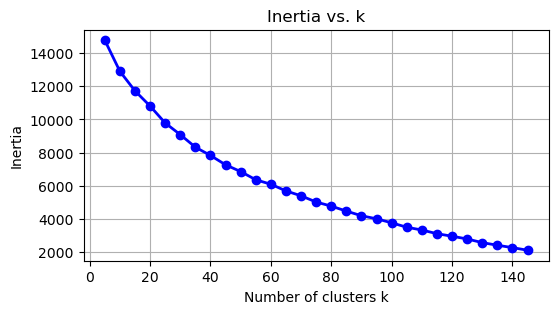

In [18]:
#plotting interia vs k 
plt.figure(figsize=(6,3))
plt.plot(k_values, inertias, 'bo-', linewidth=2)
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia")
plt.title("Inertia vs. k") 
plt.grid(True)
plt.show()

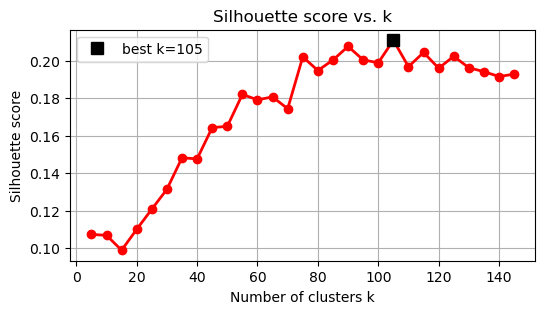

In [19]:
best_idx = np.argmax(sil_scores)
best_k   = k_values[best_idx]

plt.figure(figsize=(6,3))
plt.plot(k_values, sil_scores, 'ro-', linewidth=2)
plt.plot(best_k, sil_scores[best_idx], 'ks', markersize=8,
         label=f"best k={best_k}")
plt.xlabel("Number of clusters k")
plt.ylabel("Silhouette score")
plt.title("Silhouette score vs. k")
plt.legend()
plt.grid(True)
plt.show()

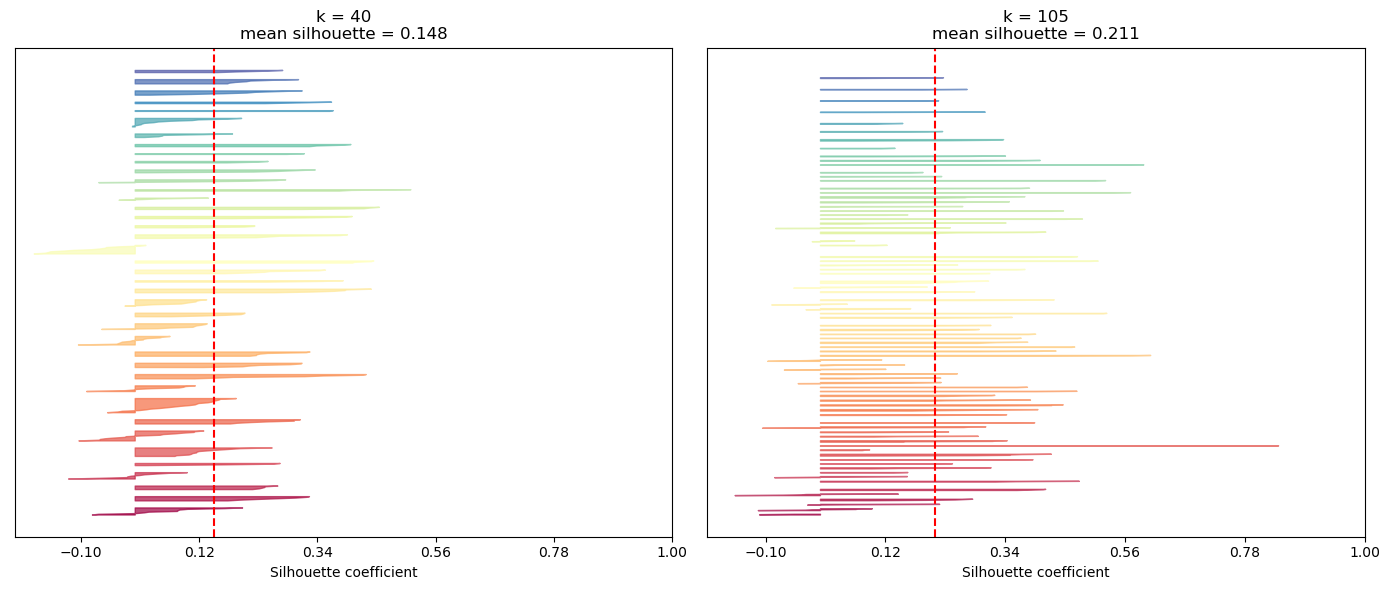

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter

# k values to compare
ks = [40, best_k]  
labels_list = [models[k_values.index(k)].labels_ for k in ks]
X_red = X_train_data    

plt.figure(figsize=(14, 6))

for idx, (k, labels) in enumerate(zip(ks, labels_list), start=1):
    sil_vals = silhouette_samples(X_red, labels)
    avg_score = silhouette_score(X_red, labels)
    
    # subplot
    ax = plt.subplot(1, 2, idx)
    padding = len(sil_vals) // 30
    y_lower = padding
    ticks = []
    
    for cluster in range(k):
        cluster_vals = np.sort(sil_vals[labels == cluster])
        y_upper = y_lower + len(cluster_vals)
        
        color = plt.cm.Spectral(cluster / k)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0, cluster_vals,
            facecolor=color, edgecolor=color, alpha=0.7
        )
        ticks.append((y_lower + y_upper) / 2)
        y_lower = y_upper + padding
    
    # formatting axes
    ax.yaxis.set_major_locator(FixedLocator(ticks))
    ax.yaxis.set_major_formatter(FixedFormatter(range(k)))
    ax.set_xlabel("Silhouette coefficient")
    ax.set_xticks(np.linspace(-0.1, 1.0, 6))
    ax.set_title(f"k = {k}\nmean silhouette = {avg_score:.3f}")
    ax.axvline(avg_score, color="red", linestyle="--")
    ax.set_yticks([]) 

plt.tight_layout()
plt.show()


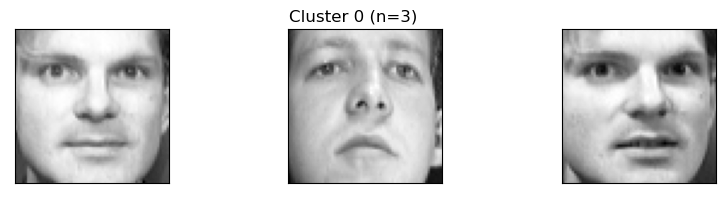

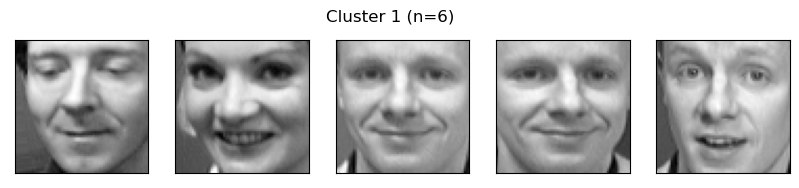

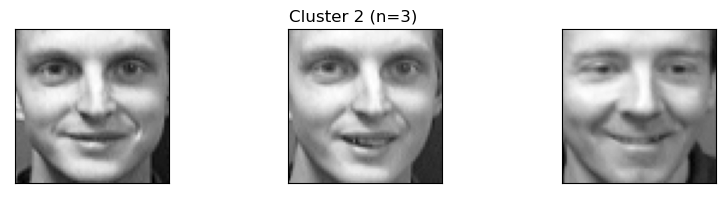

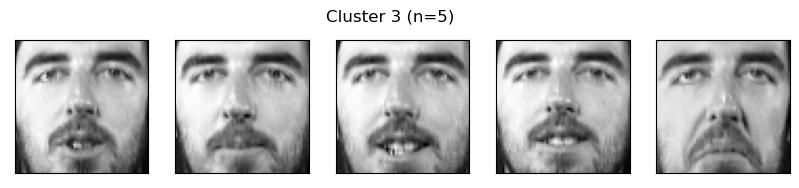

In [21]:
labels = models[best_idx].labels_

for cluster_id in range(best_k):
    idxs = np.where(labels == cluster_id)[0]
    if len(idxs) == 0:
        continue
    sel = idxs[:5]  # pick up to 5 examples
    fig, axes = plt.subplots(1, len(sel), figsize=(10,2), subplot_kw={'xticks':[], 'yticks':[]})
    for ax, i in zip(axes, sel):
        ax.imshow(X_train[i].reshape(64,64), cmap="gray")
    fig.suptitle(f"Cluster {cluster_id} (n={len(idxs)})")
    plt.show()
    if cluster_id >= 3:
        break

## (b) [2 marks]

Continue to use the reduced features based on PCA in (a). Train a random forest classifier `RandomForestClassifier(n_estimators=150, random_state=42)` and a histogram-based gradient boosting classifier using `HistGradientBoostingClassifier(max_iter=200, random_state=42, early_stopping=True, validation_fraction=0.2)` to predict which person is represented in each picture, and evaluate it on the validation set. For the gradient boosting classifier state the optimal number of iterations from early stopping. State which of the two models is better.

**[Add your solution here]**

In [22]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
rf_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rf_clf.fit(X_train_data, y_train)
y_pred_rf = rf_clf.predict(X_valid_data)
acc_rf = accuracy_score(y_valid, y_pred_rf)
print(f"Random Forest accuracy:    {acc_rf:.4f}")

hdb_clf = HistGradientBoostingClassifier(max_iter=200, random_state=42, early_stopping=True, validation_fraction=0.2)
hdb_clf.fit(X_train_data, y_train)
y_pred_hdb = hdb_clf.predict(X_valid_data)
acc_hdb = accuracy_score(y_valid, y_pred_hdb)
print(f"HistGradientBoosting accuracy: {acc_hdb:.4f}")


Random Forest accuracy:    0.9333
HistGradientBoosting accuracy: 0.7667


## (c) Chapter 9, Question 11 [4 marks]

Continuing on from (b), regardless of which model is better, use the random forest classifier. Next, use k-Means as a dimensionality reduction tool, and train a classifier. Search for the number of clusters $k\in\{5,10,15,\dots,145\}$ that allows the classifier to get the best performance on the validation set. What performance can you reach on the validation set? What if you append the features from the reduced set to the original features and again search for the best number of clusters?

**[Add your solution here]**

In [23]:
# validation set 
k_range = range(5, 150, 5)
best_acc = 0
best_k   = None

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    X_train_reduced = kmeans.fit_transform(X_train_data)
    X_valid_reduced = kmeans.transform(X_valid_data)
    
    rf_clf.fit(X_train_reduced, y_train)
    y_pred_reduced = rf_clf.predict(X_valid_reduced)
    acc = accuracy_score(y_valid, y_pred_reduced)
    print(f"k={k:3d} → validation accuracy = {acc:.4f}")

k=  5 → validation accuracy = 0.3167
k= 10 → validation accuracy = 0.5417
k= 15 → validation accuracy = 0.6417
k= 20 → validation accuracy = 0.5917
k= 25 → validation accuracy = 0.7000
k= 30 → validation accuracy = 0.7333
k= 35 → validation accuracy = 0.7333
k= 40 → validation accuracy = 0.7333
k= 45 → validation accuracy = 0.7917
k= 50 → validation accuracy = 0.7667
k= 55 → validation accuracy = 0.7167
k= 60 → validation accuracy = 0.7750
k= 65 → validation accuracy = 0.7750
k= 70 → validation accuracy = 0.7917
k= 75 → validation accuracy = 0.7500
k= 80 → validation accuracy = 0.7667
k= 85 → validation accuracy = 0.8000
k= 90 → validation accuracy = 0.7917
k= 95 → validation accuracy = 0.8000
k=100 → validation accuracy = 0.7917
k=105 → validation accuracy = 0.7667
k=110 → validation accuracy = 0.8333
k=115 → validation accuracy = 0.7833
k=120 → validation accuracy = 0.8250
k=125 → validation accuracy = 0.8083
k=130 → validation accuracy = 0.8083
k=135 → validation accuracy = 0.7667
k

In [24]:
# Append the features 
best_acc2 = 0
best_k2 = None 
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    X_train_reduced = kmeans.fit_transform(X_train_data)
    X_valid_reduced = kmeans.transform(X_valid_data)
    
    X_train_full = np.c_[X_train_data, X_train_reduced]
    X_valid_full = np.c_[X_valid_data, X_valid_reduced]

    rf_clf.fit(X_train_full, y_train)
    acc = accuracy_score(y_valid, rf_clf.predict(X_valid_full))
    
    print(f"k={k:3d} → validation accuracy (appended) = {acc:.4f}")

k=  5 → validation accuracy (appended) = 0.9417
k= 10 → validation accuracy (appended) = 0.9167
k= 15 → validation accuracy (appended) = 0.8917
k= 20 → validation accuracy (appended) = 0.8917
k= 25 → validation accuracy (appended) = 0.8833
k= 30 → validation accuracy (appended) = 0.9083
k= 35 → validation accuracy (appended) = 0.8667
k= 40 → validation accuracy (appended) = 0.8833
k= 45 → validation accuracy (appended) = 0.8917
k= 50 → validation accuracy (appended) = 0.8667
k= 55 → validation accuracy (appended) = 0.9000
k= 60 → validation accuracy (appended) = 0.9000
k= 65 → validation accuracy (appended) = 0.8583
k= 70 → validation accuracy (appended) = 0.8833
k= 75 → validation accuracy (appended) = 0.8667
k= 80 → validation accuracy (appended) = 0.8833
k= 85 → validation accuracy (appended) = 0.8833
k= 90 → validation accuracy (appended) = 0.8583
k= 95 → validation accuracy (appended) = 0.8917
k=100 → validation accuracy (appended) = 0.8417
k=105 → validation accuracy (appended) =

# 4. Finding regimes in time series [12 marks]

## (a) [6 marks]
Obtain the daily values of the CPI and unemployment rate from FRED up to 2023-01-01 and then convert the CPI into the yearly inflation rate `inf_data` using the following code. Note that you may have to install the package `pandas_datareader`. Alternatively, you can download the data as a csv file from [Canvas](https://canvas.uw.edu/files/105781273/download?download_frd=1).

In [25]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

unemp_data = pdr.get_data_fred('UNRATE', datetime(1945,1,1),datetime(2023,1,1))
cpi_data = pdr.get_data_fred('CPIAUCSL', datetime(1945,1,1),datetime(2023,1,1))
inf_data = (cpi_data/cpi_data.shift(12)-1).iloc[12:]
data = pd.concat([inf_data, unemp_data],axis=1)

Split the data into a training set (before Jan 2005, using `data[:"2005-1-1"]` for instance) and a test set (Jan 2005 and after). Now, ignore the time aspect of your training set by treating it as a 2-dimensional dataset. Use k-means to divide your training set into a number of clusters called **regimes**. To find the number of regimes (clusters) $k\in\{2,3,\dots,10\}$: (i) plot inertia, (ii) plot silhouette scores, (iii) plot silhouette diagrams for $k\in\{2,3,\dots,10\}$. How many regimes do you choose? Explain your answer. Recall that you should use a standard scaler before applying k-means.

**[Add your solution here]**

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
data.columns = ['Inflation','Unemployment']
train = data[:'2005-01-01']
test  = data['2005-01-01':]
X_train = train.values  #turns the Data frame to Numpy Array 
X_test  = test.values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

k_range    = range(2,11)
inertias   = []
sil_scores = []
models     = []

for k in k_range :
    km = KMeans (n_clusters=k, random_state=42)
    labels = km.fit_predict(X_train_scaled)

    models.append(km)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_train_scaled, labels))

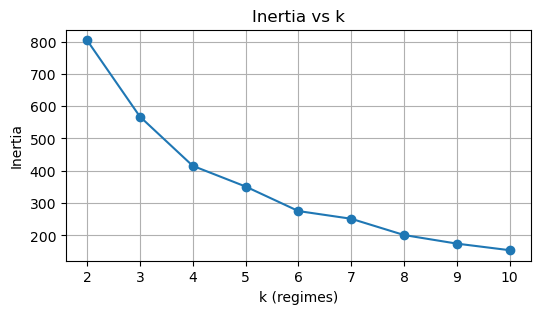

In [28]:
#Plot inertia 
plt.figure(figsize=(6,3))
plt.plot(k_range, inertias, 'o-', color='C0')
plt.xlabel('k (regimes)'); plt.ylabel('Inertia')
plt.title('Inertia vs k'); plt.grid(True)
plt.show()

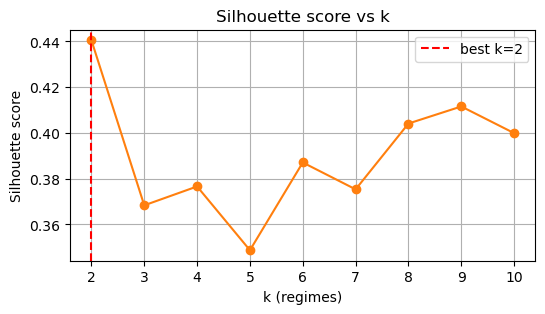

In [29]:
plt.figure(figsize=(6,3))
plt.plot(k_range, sil_scores, 'o-', color='C1')
best_k = k_range[np.argmax(sil_scores)]
plt.axvline(best_k, color='red', linestyle='--',
            label=f'best k={best_k}')
plt.xlabel('k (regimes)'); plt.ylabel('Silhouette score')
plt.title('Silhouette score vs k')
plt.legend(); plt.grid(True)
plt.show()

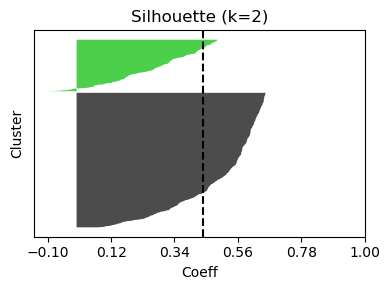

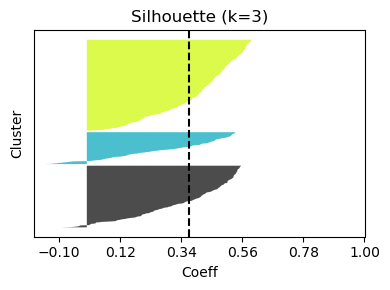

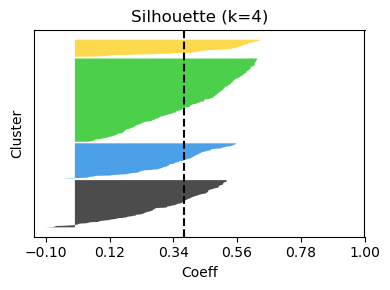

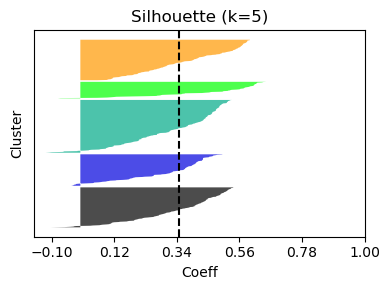

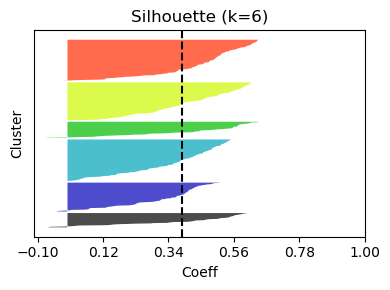

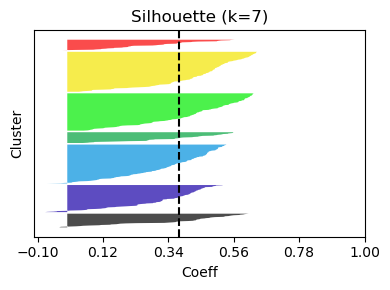

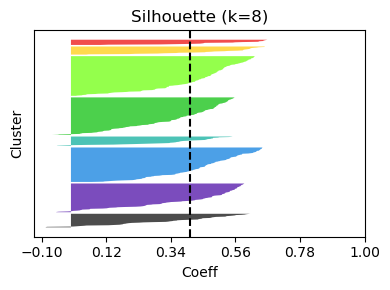

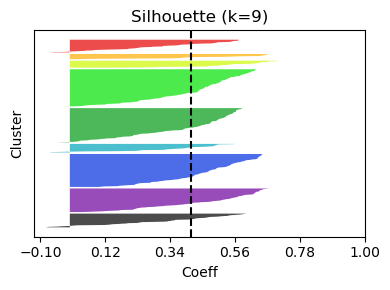

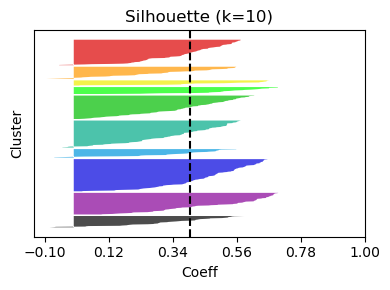

In [30]:
# 5(iii) Silhouette diagrams for k=2..10
def plot_silhouette_diagram(k, X, labels):
    sil_vals = silhouette_samples(X, labels)
    y_lower = 10
    plt.figure(figsize=(4,3))
    for cluster in range(k):
        vals = np.sort(sil_vals[labels==cluster])
        y_upper = y_lower + len(vals)
        color = plt.cm.nipy_spectral(cluster / k)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, vals, facecolor=color, alpha=0.7)
        y_lower = y_upper + 5
    plt.axvline(sil_vals.mean(), color='k', linestyle='--')
    plt.title(f'Silhouette (k={k})')
    plt.xlabel('Coeff'); plt.ylabel('Cluster')
    plt.xticks(np.linspace(-0.1,1.0,6))
    plt.yticks([])
    plt.tight_layout()
    plt.show()

for k, km in zip(k_range, models):
    labels = km.labels_
    plot_silhouette_diagram(k, X_train_scaled, labels)


## (b) [3 marks]

Report the centroid of the regimes in (a). For the training set, plot the inflation rate (x-axis) vs unemployment rate (y-axis) after these features have been standardized, and show the regimes and centroids in the plot. For the test set, plot time series of the inflation rate and unemployment rate (the original series before standardization), and show the regimes on the plot. The regimes can be shown using time series (line graphs) of the centroid for each of two series for instance, and the following code can be used, where `best_mod_pred` is the prediction on the test set from the best model.

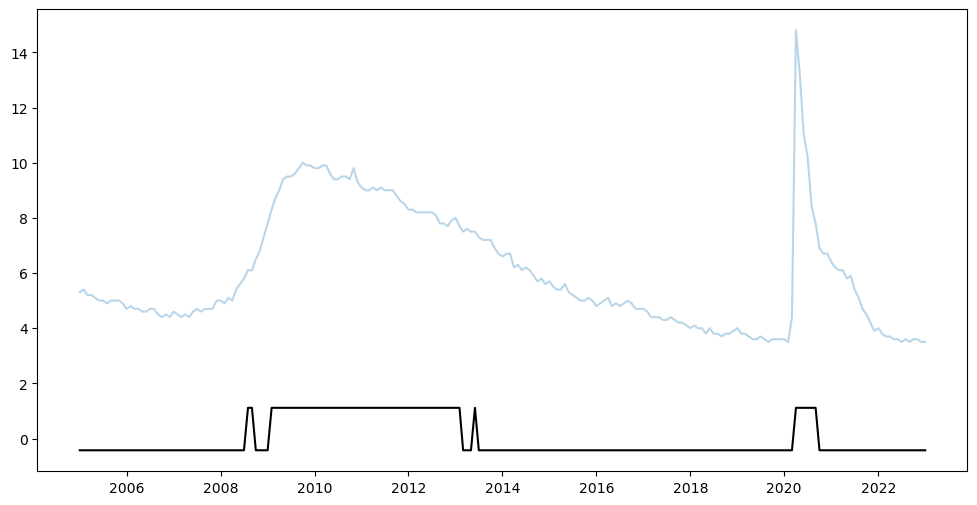

In [33]:
best_k = k_range[np.argmax(sil_scores)]
best_km = models[k_range.index(best_k)]
X_test_scaled = scaler.transform(test.values)
best_mod_pred = best_km.predict(X_test_scaled)

clusters = best_km.cluster_centers_   
regimes_train = pd.DataFrame(test.iloc[:,1]).assign(
    regime = clusters[best_mod_pred][:,1].flatten()
)

plt.figure(figsize=(12,6))
plt.plot(regimes_train["Unemployment"], label="vol", alpha=.3)
plt.plot(regimes_train["regime"], '-k', label="regime")


**[Add your solution here]**

In [34]:
# report the centroid 
print("Regime centroids:")
for i, (c_inf, c_unr) in enumerate(clusters):
    print(f"  Regime {i}: Inflation={c_inf:.3f}, Unemployment={c_unr:.3f}")

Regime centroids:
  Regime 0: Inflation=-0.367, Unemployment=-0.427
  Regime 1: Inflation=0.957, Unemployment=1.112


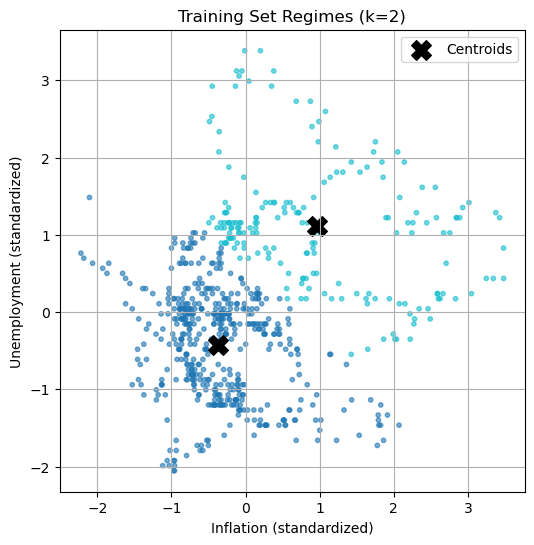

In [35]:
#inflation vs. unemployment, colored by regime
labels_train = best_km.predict(X_train_scaled)

plt.figure(figsize=(6,6))
plt.scatter(
    X_train_scaled[:,0], X_train_scaled[:,1],
    c=labels_train, cmap='tab10', s=10, alpha=0.6
)
plt.scatter(
    clusters[:,0], clusters[:,1],
    c='black', s=200, marker='X', label='Centroids'
)
plt.xlabel("Inflation (standardized)")
plt.ylabel("Unemployment (standardized)")
plt.title(f"Training Set Regimes (k={best_k})")
plt.legend(loc='best')
plt.grid(True)
plt.show()


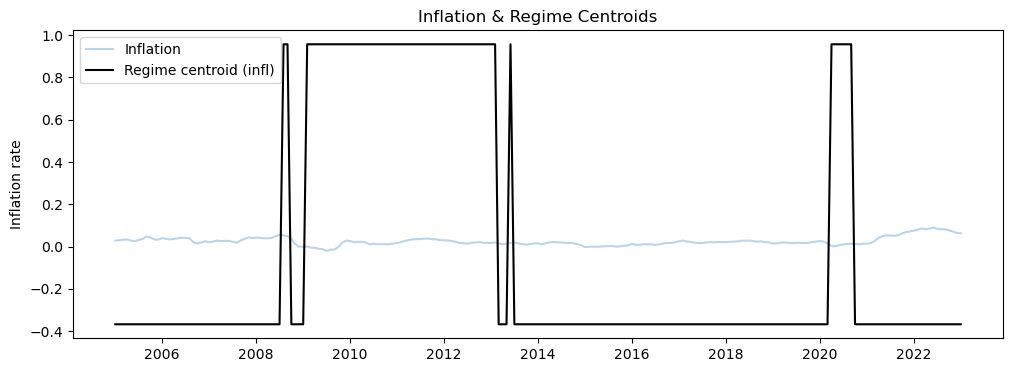

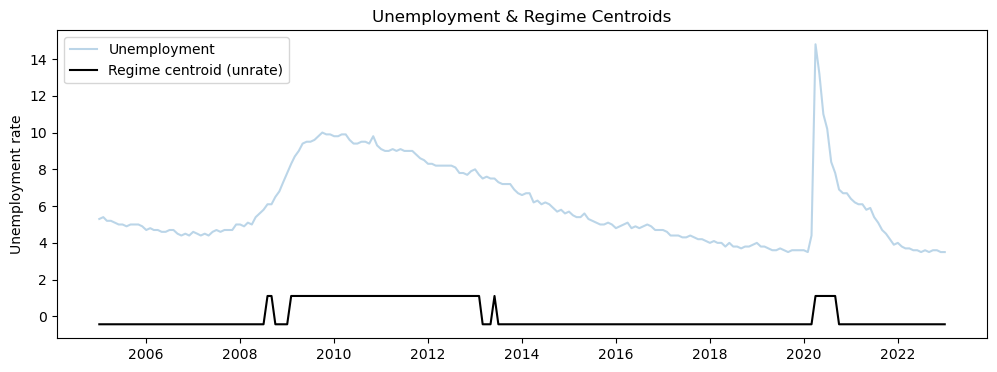

In [40]:
# Build your regimes_test DataFrame from the real columns
regimes_test = test[['Inflation','Unemployment']].copy()

# add two columns for the centroid 
regimes_test['regime_inf'] = clusters[best_mod_pred][:,0]
regimes_test['regime_unr'] = clusters[best_mod_pred][:,1]

# Plot inflation
plt.figure(figsize=(12,4))
plt.plot(regimes_test.index, regimes_test['Inflation'], label='Inflation', alpha=0.3)
plt.plot(regimes_test.index, regimes_test['regime_inf'], '-k', label='Regime centroid (infl)')
plt.ylabel("Inflation rate")
plt.title("Inflation & Regime Centroids")
plt.legend()
plt.show()

# Plot unemployment
plt.figure(figsize=(12,4))
plt.plot(regimes_test.index, regimes_test['Unemployment'],label='Unemployment', alpha=0.3)
plt.plot(regimes_test.index, regimes_test['regime_unr'], '-k', label='Regime centroid (unrate)')
plt.ylabel("Unemployment rate")
plt.title("Unemployment & Regime Centroids")
plt.legend()
plt.show()


## (c) [3 marks]

A regime-switching model is a probabilistic model that governs how regime transitions take place. A very simple regime-switching model is a Markov chain. Here, we assume that the next month's regime depends on the current regime. In other words, all we need to know are the **transition probabilities** $p_{i,j} = \mathbb{P}(X_{t+1}=j|X_t=i)$, where $X_t$ is the regime at day $t$. Using the time series of regimes in the training set that you found in (b), estimate these transition probabilities, as follows:
\begin{align*}
    p_{i,j} = \frac{\mathbb{P}(X_{t+1}=j \text{ and } X_t=i)}{\mathbb{P}(X_t=i)}\approx \frac{\text{number of transition from regime $i$ to $j$}}{\text{number of transition from regime $i$}}
\end{align*}
Next, let us check how good your regime switching model is. Calculate the transition probabilities using the test set. Do not retrain your k-means clusterer, simply use it to predict the regimes of the test set. Then, repeat the estimation of the transition probabilities on the test set.

Note: Depending on your choice of $k$, it is possible that some $p_{i,j}$ cannot be estimated due to  having no transitions from regime $i$.

**[Add your solution here]**

In [37]:
def transition_probs(labels, k):
    # build the contingency table 
    df = pd.DataFrame({'prev': labels[:-1],'next': labels[1:]})
    # Count how many time each pair occurs in your data 
    P = pd.crosstab(df['prev'], df['next']).reindex(index=range(k), columns=range(k))
    return P.div(P.sum(axis=1), axis=0)
# divides each element Pij by the corresponding row sum for i 
k = best_k

# Training‐set transitions
labels_train = best_km.predict(X_train_scaled)
P_train = transition_probs(labels_train, k)
print("Training‐set transition matrix:")
display(P_train)

# 2) Test‐set transitions (no re‐fit of KMeans)
labels_test = best_km.predict(X_test_scaled)
P_test = transition_probs(labels_test, k)
print("Test‐set transition matrix:")
display(P_test)


Training‐set transition matrix:


next,0,1
prev,,
0,0.991903,0.008097
1,0.021053,0.978947


Test‐set transition matrix:


next,0,1
prev,,
0,0.974684,0.025316
1,0.068966,0.931034


# 5. Optional exercise: Neural Networks

There is nothing to submit for this exercise. However, it is strongly recommended that you spend time going through this exercise.

Visit the TensorFlow Playground at [https://playground.tensorflow.org/](https://playground.tensorflow.org/)

## (a)
**Layers and patterns:** Try training the default neural network by clicking the run button (top left). Notice how it quickly finds a good solution for the classification task. Notice that the neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns. In general, the more layers, the more complex the patterns can be.

## (b)
**Activation function:** Try replacing the Tanh activation function with the ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function.

Try, also, the sigmoid (i.e. the logistic) activation function. Note that it will take significantly more time for the ANN to properly classify the dataset (you should wait until around 900 epochs).

## (c)

**Local minima:** Modify the network architecture to have just one hidden layer with three neurons and the ReLU activation function. Train it multiple times. Between each training, press the reset button next to the play button on the top left. Notice that the training time and the shape of the decision borders varies a lot. If you are patient enough, you will notice that sometimes the network gets stuck in a local minimum which does not properly separate the classes (this happens at random).

## (d)

**Not enough neurons:** Next, remove one neuron so that you have only one hidden layer with 2 neurons. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and it systematically underfits the training set.

## (e)
**Enough neurons:** Next, set the number of neurons to 8 and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks almost never get stuck at local optima, and even when they do these local optima are almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.

## (f)

**DNNs and vanishing gradients:** Now change the dataset to be the spiral (bottom right dataset under “DATA”). Change the network architecture to have 4 hidden layers with 8 neurons each. Notice that training takes much longer, and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (i.e. on the right) tend to evolve faster than the neurons in the lowest layers (i.e. on the left). This problem, called the “vanishing gradients” problem, can be alleviated using better weight initialization and other techniques, better optimizers (such as AdaGrad or Adam), or using Batch Normalization.